In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,StratifiedKFold,cross_val_score,RandomizedSearchCV
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as RanFor

In [4]:
#from google.colab import files
#uploaded = files.upload()

import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [5]:
file =pd.read_csv("WP_fulldataset.csv")
file2=pd.read_csv("WP_fulldataset.csv")

In [6]:
file.head(5)

,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,...,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,200.0,1743,38.213814,-4.556877,Pangani,1,True,VWC,True,2002,...,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,non functional
1,0.0,0,33.685510,-9.492351,Lake Nyasa,0,True,VWC,True,0,...,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,functional
2,0.0,0,33.601260,-2.948101,Lake Victoria,0,True,WUG,False,0,...,gravity,unknown,unknown,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,non functional
3,0.0,0,33.100029,-8.973678,Lake Rukwa,0,True,VWC,False,0,...,handpump,user-group,on failure,soft,good,enough,shallow well,groundwater,hand pump,functional
4,400.0,531,37.418773,-10.915576,Ruvuma / Southern Coast,1,False,VWC,False,2009,...,handpump,user-group,monthly,soft,good,enough,machine dbh,groundwater,hand pump,non functional


In [7]:
file.drop(["extraction_type","source_class","payment_type","water_quality"],axis=1,inplace=True)

In [8]:
file.columns


Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'quality_group', 'quantity', 'source', 'waterpoint_type',
       'status_group'],
      dtype='object')

I have realised that  scheme_management columns has majaority of null values let's look it up .


Determining which columns has null values


In [9]:
nullcols = []
for col in file.columns:
    nbnull = (file[col].isnull()*1).sum()
    if ( nbnull > 0 ):
        tp = type(file[file[col].notnull()][col].iat[0]) 
        nullcols.append([col, tp])
        print(col, nbnull, tp)
        
        
nullcols = []
for col in file.columns:
    nbnull = (file[col].isnull()*1).sum()
    if ( nbnull > 0 ):
        tp = type(file[file[col].notnull()][col].iat[0]) 
        nullcols.append([col, tp])        

public_meeting 2497 <class 'bool'>
scheme_management 2937 <class 'str'>
permit 2309 <class 'bool'>


2937


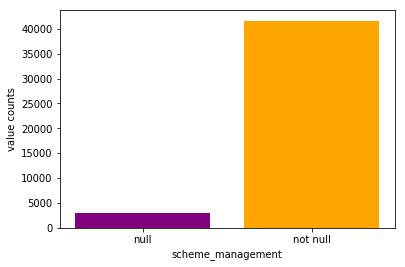

not null percentage0.9340740740740741


In [10]:
sch_mng_null=file["scheme_management"].isnull().sum()
sch_mng_notnull=file["scheme_management"].notnull().sum()

count=[]

count.append(sch_mng_null)
count.append(sch_mng_notnull)
print(count[0])
y=count
x=["null","not null"]

plt.bar(x,y,color=["purple","orange"])
plt.xlabel("scheme_management")
plt.ylabel("value counts")
plt.show()

print("not null percentage"+str(sch_mng_notnull/file.shape[0]))



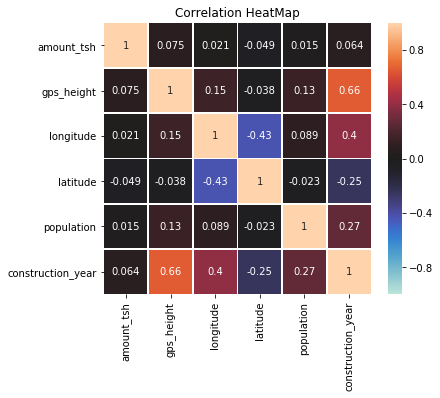

In [11]:
##Pearson Correlation Matrix
features = file.loc[:,file.columns != 'status_group']




corr = features.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [13]:
const_year_zeros=file.loc[file["construction_year"]==0]

const_year_zeros.head(5)

,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,quality_group,quantity,source,waterpoint_type,status_group
1,0.0,0,33.685510,-9.492351,Lake Nyasa,0,True,VWC,True,0,gravity,user-group,good,enough,spring,communal standpipe,functional
2,0.0,0,33.601260,-2.948101,Lake Victoria,0,True,WUG,False,0,gravity,unknown,good,seasonal,rainwater harvesting,communal standpipe,non functional
3,0.0,0,33.100029,-8.973678,Lake Rukwa,0,True,VWC,False,0,handpump,user-group,good,enough,shallow well,hand pump,functional
7,0.0,0,32.777529,-3.475443,Lake Victoria,0,True,VWC,True,0,gravity,user-group,good,enough,lake,other,functional
8,0.0,0,30.956270,-2.785085,Lake Victoria,0,True,VWC,True,0,submersible,user-group,good,dry,dam,communal standpipe multiple,non functional


In [14]:
zero_count=0
for x in const_year_zeros:
  if x:
    zero_count=zero_count+1
  
print("Construction years which are 0 ="+str(zero_count))


Construction years which are 0 =17


In [ ]:
const

In [15]:
only_pop_zero=[]
#pop_zeros=file["population"]==0

only_pop_zero=file.loc[(file['population'] == 0)]

##for i in range(0,len(file)):
  # if(file[i]["population"]==0):
   #   only_pop_zero.append(file[i])



In [16]:
only_gps_zero=file.loc[(file['gps_height'] == 0)]

only_gps_zero.shape

(15397, 17)

In [18]:
# before filling the null keep track of them
#dfX['construction_year_missing'] = (dfX['construction_year']==0)*1
#dates.append( 'construction_year_missing' ) # list of dates related fields

# to fill missing dates, can use : mean, median or oldest
mean_year = file[file['construction_year']>0]['construction_year'].mean()

mean_population=file[file['population']>0]['population'].mean()

file.loc[file['construction_year']==0, 'construction_year'] = int(mean_year)
file.loc[file['population']==0, 'population'] = int(mean_population)

In [58]:
maen_population

280.61394384509964

In [19]:
file.head()

,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,quality_group,quantity,source,waterpoint_type,status_group
0,200.0,1743,38.213814,-4.556877,Pangani,1,True,VWC,True,2002,gravity,user-group,good,enough,spring,communal standpipe,non functional
1,0.0,0,33.685510,-9.492351,Lake Nyasa,280,True,VWC,True,1996,gravity,user-group,good,enough,spring,communal standpipe,functional
2,0.0,0,33.601260,-2.948101,Lake Victoria,280,True,WUG,False,1996,gravity,unknown,good,seasonal,rainwater harvesting,communal standpipe,non functional
3,0.0,0,33.100029,-8.973678,Lake Rukwa,280,True,VWC,False,1996,handpump,user-group,good,enough,shallow well,hand pump,functional
4,400.0,531,37.418773,-10.915576,Ruvuma / Southern Coast,1,False,VWC,False,2009,handpump,user-group,good,enough,machine dbh,hand pump,non functional


In [ ]:
file.shape


In [20]:
file.head()

,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,quality_group,quantity,source,waterpoint_type,status_group
0,200.0,1743,38.213814,-4.556877,Pangani,1,True,VWC,True,2002,gravity,user-group,good,enough,spring,communal standpipe,non functional
1,0.0,0,33.685510,-9.492351,Lake Nyasa,280,True,VWC,True,1996,gravity,user-group,good,enough,spring,communal standpipe,functional
2,0.0,0,33.601260,-2.948101,Lake Victoria,280,True,WUG,False,1996,gravity,unknown,good,seasonal,rainwater harvesting,communal standpipe,non functional
3,0.0,0,33.100029,-8.973678,Lake Rukwa,280,True,VWC,False,1996,handpump,user-group,good,enough,shallow well,hand pump,functional
4,400.0,531,37.418773,-10.915576,Ruvuma / Southern Coast,1,False,VWC,False,2009,handpump,user-group,good,enough,machine dbh,hand pump,non functional


In [123]:
file.shape

(44550, 17)

In [21]:
file=pd.get_dummies(file,columns=['basin',
       'public_meeting', 'scheme_management', 'permit',
        'extraction_type_class', 'management_group',
       'quality_group', 'quantity', 'source', 'waterpoint_type'])

In [22]:
#dropped_file_for_X=file.drop(['status_group'], axis=1)

#X_d=pd.get_dummies(dropped_file_for_X)
#y_before_dummies=file['status_group']
                      
#y_d=pd.get_dummies(y_before_dummies)
                      
#y = np.array(y_d)
#X = np.array(X_d)
X=file.drop(['status_group'], axis=1)
y=file['status_group']
print('X and y:', X.shape, y.shape)
random_seed=42
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed, stratify=y)

print(len(X_train))



X and y: (44550, 71) (44550,)
29848


In [23]:
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)



In [25]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}

# Set the amount of folds for the cross-validation
n_folds = 5

# Do a model fit over a grid of C hyperparameters
Clf = LogisticRegression(penalty='l1', random_state=random_seed)
grid_logReg = GridSearchCV(Clf, C_grid, cv=n_folds, refit=True)
y_train
grid_logReg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

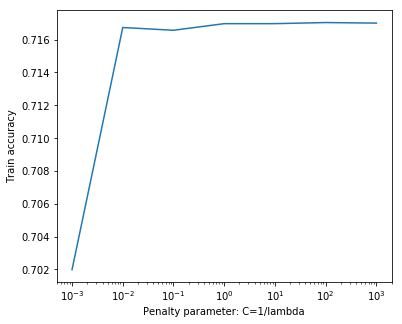

In [26]:
plt.figure(figsize=(6,5))
plt.semilogx(C_values, grid_logReg.cv_results_['mean_test_score'])
plt.xlabel('Penalty parameter: C=1/lambda')
plt.ylabel('Train accuracy')
plt.show()

In [33]:
Clf = LogisticRegression(penalty='l1', C=0.01, random_state=random_seed)
Clf.fit(X_train, y_train)
predictions = Clf.predict(X_test)
print( 'Training accuracy       :',(accuracy_score(y_train, Clf.predict(X_train))) )
print( 'Classification accuracy :',(accuracy_score(y_test, predictions)) ,"\n")

Training accuracy       : 0.7172339855266685
Classification accuracy : 0.718541695007482 



In [38]:
kfolds = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
cv_scores = [] ; training_scores = []
print(' k   CV-mean-score  95% CI')
knnindex = np.arange(1, 30, 2)

for k in knnindex:
    classifier = KNeighborsClassifier(n_neighbors = k) 
    scores = model_selection.cross_val_score(Clf, X_train, y_train, cv=kfolds, scoring='accuracy')
    cv_scores.append(scores.mean()) 
    print('%2d   %.3f          %.3f' %(k, scores.mean(), scores.std()) )
    classifier.fit(X_train, y_train)
    training_scores.append(accuracy_score(y_train, classifier.predict(X_train)))
    
MSEv = [1 - x for x in cv_scores]
MSEt = [1 - x for x in training_scores]
optimal_k = knnindex[MSEv.index(min(MSEv))] 
print("The optimal number of neighbors is %d" % optimal_k)

 k   CV-mean-score  95% CI
 1   0.717          0.004
 3   0.717          0.004
 5   0.717          0.004


KeyboardInterrupt: 

In [44]:
# ---------------- Random Forest---------------------------------------------------------
#Default Model
Clf_def = RanFor(random_state=random_seed)
kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
cv_results = model_selection.cross_val_score(Clf_def, X_train, y_train, cv=kfold, scoring='accuracy')
Clf_def.fit(X_train, y_train)
predictions = Clf_def.predict(X_test)
print('Classifier used:\n', Clf_def, '\n')
print( 'Training accuracy       :',(accuracy_score(y_train, Clf_def.predict(X_train))) )
print( 'Classification accuracy :',(accuracy_score(y_test, predictions)))


Classifier used:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 

Training accuracy       : 0.978256499597963
Classification accuracy : 0.7792137124200789


num-of-trees  CV-mean-score  Train-score
   1          0.718          0.896
   3          0.755          0.943
   5          0.765          0.962
   7          0.771          0.973
   9          0.774          0.978
  11          0.776          0.982
  13          0.779          0.985
  15          0.779          0.987
  17          0.780          0.988
  19          0.781          0.988
  21          0.781          0.989
  23          0.782          0.990
  25          0.782          0.990
  27          0.783          0.991
  29          0.784          0.991
  31          0.784          0.992
  33          0.784          0.992
  35          0.784          0.992
  37          0.784          0.992
  39          0.785          0.992
  41          0.785          0.993
  43          0.785          0.993
  45          0.786          0.993
  47          0.785          0.993
  49          0.785          0.993


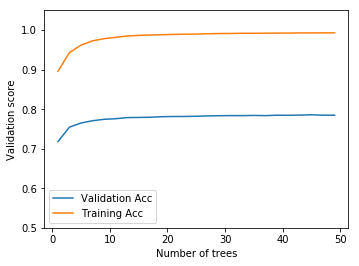

In [49]:
seed = 42
clf = RanFor(random_state=seed)
#n_estimators = [1,10,20, 50, 100, 200, 400, 600]
n_estimators=[]
for z in range(1,50,2):
    n_estimators.append(z)
    
cv_scores = [] ; train_scores = [] ; exectime = []
print('num-of-trees  CV-mean-score  Train-score')

for i in n_estimators:
    clf.set_params(n_estimators = i)
    
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean())
    clf.fit(X_train, y_train)
    
    acc = accuracy_score(y_train, clf.predict(X_train))
    train_scores.append(acc)
    
    print('%4d          %5.3f          %5.3f' %(i, scores.mean(), acc ))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(n_estimators, cv_scores, label='Validation Acc')
plt.plot(n_estimators, train_scores, label='Training Acc')
plt.xlabel('Number of trees')
plt.ylabel('Validation score')
plt.legend() ; plt.ylim(0.5,1.05)

plt.show()

Number of trees used: 21
max-depth  CV-mean-score  Train-score
 2         0.682          0.993
 4         0.709          0.993
 6         0.722          0.993
 8         0.733          0.993
10         0.748          0.993
12         0.761          0.993
14         0.773          0.993
16         0.781          0.993
20         0.785          0.993
22         0.787          0.993
24         0.787          0.993
26         0.784          0.993
28         0.783          0.993
30         0.782          0.993


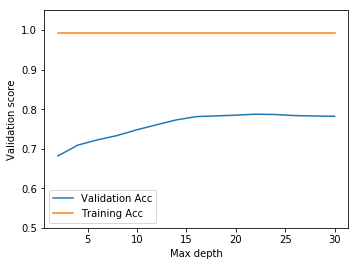

In [52]:
#num of trees =21 is ok!...
seed = 40
num_tree = 21
clfO = RanFor(n_estimators = num_tree, random_state=seed)
max_depth = [2, 4, 6, 8,10,12,14,16,20,22,24,26,28,30]
cv_scores = [] ; train_scores = [] ; exectime = []
print('Number of trees used:', num_tree)
print('max-depth  CV-mean-score  Train-score')

for i in max_depth:
    clfO.set_params(max_depth = i)
   
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
    scores = model_selection.cross_val_score(clfO, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean())
    clfO.fit(X_train, y_train)
   
    acc = accuracy_score(y_train, clf.predict(X_train))
    train_scores.append(acc)
   
    print('%2d         %5.3f          %5.3f' %(i, scores.mean(), acc ))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(max_depth, cv_scores, label='Validation Acc')
plt.plot(max_depth, train_scores, label='Training Acc')
plt.xlabel('Max depth')
plt.ylabel('Validation score')
plt.legend() ; plt.ylim(0.5,1.05)

plt.show()

In [59]:
#RandomizedGridSearchCV

# The function to measure the quality of a split
criterion = ['entropy', 'gini']
# Number of features to consider at every split
max_features = [3, 4, 5, 13]
# Maximum number of levels in tree
max_depth = [22]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Number of trees
n_estimators = [100, 200, 400]
# Create the random grid
random_grid = {'criterion'        : criterion,
               'max_features'     : max_features,
               'max_depth'        : max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'n_estimators'     : n_estimators}
print(random_grid)


{'criterion': ['entropy', 'gini'], 'max_features': [3, 4, 5, 13], 'max_depth': [22], 'min_samples_split': [2, 3, 5, 10, 12], 'min_samples_leaf': [1, 2, 3, 4], 'n_estimators': [100, 200, 400]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RanFor(random_state = seed)
# Random search of parameters, using 3 fold cross validation,
kfolds = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# search across different combinations, and use all available cores
randomGrid = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = kfolds, 
                                random_state=seed, n_jobs = -1)
# Fit the random search model

randomGrid.fit(X_train, y_train)



print(randomGrid.best_params_)
print(randomGrid.best_estimator_)
print('Avg CV scores in each fold:\n', randomGrid.cv_results_['mean_test_score'], '\n')
print('Best CV score in all folds:\n', randomGrid.best_score_, '\n')
print('Average CV score:\n', np.mean(randomGrid.cv_results_['mean_test_score']))

In [63]:
ClfOpt = RanFor(criterion = 'gini', n_estimators = 100, max_depth = 22, min_samples_leaf = 1, 
         min_samples_split = 5, max_features = 5, random_state = random_seed)
ClfOpt.fit(X_train, y_train)
predictions = ClfOpt.predict(X_test)
print( 'RF Training accuracy       :',(accuracy_score(y_train, Clf.predict(X_train))) )
print( 'RF Classification accuracy :',(accuracy_score(y_test, predictions)) ,"\n")

#print( 'RF Classification accuracy-TEST! :',(accuracy_score(, predictions)) ,"\n")

RF Training accuracy       : 0.7172339855266685
RF Classification accuracy : 0.7964222554754455 



In [67]:
dftest=pd.read_csv("WP_testdataset.csv")

In [68]:
predictionsOfTest = ClfOpt.predict(X_test)

In [70]:
predictionsOfTest

array(['functional', 'non functional', 'functional', ..., 'functional',
       'non functional', 'non functional'], dtype=object)

In [73]:
pd.DataFrame(predictionsOfTest).to_csv("predictionsOfTest.csv")

In [ ]:
#THE END#